In [1]:
from beta_TCVAE import beta_TCVAE
beta_TCVAE = beta_TCVAE( training =False, lr=0.001)
beta_TCVAE.load_data(data_id=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Instructions for updating:
Use tf.cast instead.
loading completed.


In [2]:
beta_TCVAE.fit(1)

  0%|          | 0/1 [00:00<?, ?it/s]

0
192
384
576
768
960
1152
1344
1536
1728
1920
2112
2304
2496
2688
2880
3072
3264
3456
3648
3840
4032
4224
4416
4608
4800
4992
5184
5376
5568
5760
5952
6144
6336
6528
6720
6912
7104
7296
7488


100%|██████████| 1/1 [00:37<00:00, 37.94s/it]


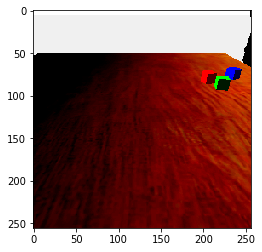

In [37]:
import matplotlib.pyplot as plt
plt.imshow(beta_TCVAE.dataset[64 * 3 * 39+2:64 * 3 * 39+2+64*3:3][5])
plt.show()

In [27]:
batch=64
beta_TCVAE.dataset.shape[0]//(batch*3)

40

In [9]:
beta_TCVAE.dataset.shape[0]

7680

In [10]:
l = [0,1,2,3,4,5,6,7,8,9,10,11]

In [21]:
l[10:66:3]

[10]

In [2]:
test = beta_TCVAE.image_test(test_head, test_right, test_left)
misc.toimage(test, cmin=0, cmax=255).save('test_image/test_'+str(i)+'.png')
del beta_TCVAE.dataset
gc.collect()

ValueError: all the input arrays must have same number of dimensions

In [2]:
beta_TCVAE.fit(epoch=300)
beta_TCVAE.Save()

100%|██████████| 300/300 [17:07:02<00:00, 205.47s/it]  


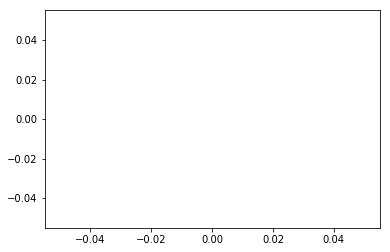

In [4]:
import matplotlib.pyplot as plt
plt.plot(beta_TCVAE.loss_list)
plt.show()

In [3]:
beta_TCVAE.Save()

####  求总体样本的均值,方差

In [64]:
from tqdm import tqdm
dataset=[]
for i in tqdm(range(20608)):
    tran_file_path = \
            '/home/baxter/catkin_ws/src/huang/scripts/explore_transitions/exp_transition%d.npy' \
            % (i + 1)
    transition = np.load(tran_file_path, allow_pickle=True)
    transition = transition.tolist()
    dataset.append(transition['observe0_img'][:,:,[2,1,0]])
    dataset.append(transition['observe1_img'][:,:,[2,1,0]])
dataset = np.array(dataset, dtype=np.float32)

mean = dataset.mean() # 116.73773
std = dataset.std()  # 57.21839
print mean
print std

100%|██████████| 20608/20608 [00:14<00:00, 1390.40it/s]


116.77986
57.100357


In [2]:
mean = 116.77986
std = 57.100357

In [3]:
beta_TCVAE.load()

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/baxter/Documents/beta-vae/checkpoints/model.ckpt


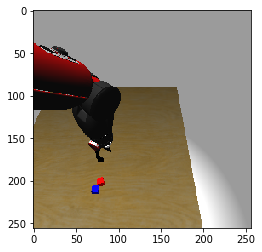

In [109]:
import numpy as np
import matplotlib.pyplot as plt
tran_file_path = \
                '/home/baxter/catkin_ws/src/huang/scripts/explore_transitions/exp_transition'+str(a)+'.npy'
transition = np.load(tran_file_path, allow_pickle=True)
transition = transition.tolist()
image_test = transition['observe1_img'][:,:,[2,1,0]]
plt.imshow(image_test)
plt.show()
a +=1

In [47]:
z = tf.zeros([1,10])

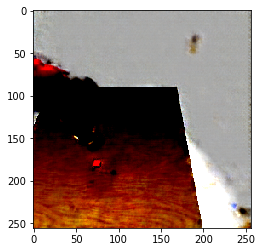

In [28]:
z_zeros =  np.zeros([1,10])
z_zeros[0,1] = -100
image = beta_TCVAE.sess.run(beta_TCVAE.img_rec, {beta_TCVAE.z: z_zeros})
plt.imshow(image[0])
plt.show()

In [3]:
import matplotlib.pyplot as plt
import imageio,os
from scipy import misc
import tensorflow as tf
import numpy as np
import sys

### 制作gif.

#### 自动删除文件夹下图像,自动生成gif

In [4]:
for d in range(10):
    d = str(d)
    z_zeros =  np.zeros([1,10])
    dim = 'dim_'+ d
    for fn in os.listdir('image/'+d+'/'):
        os.remove('image/'+d+'/'+fn)
    
    images= []
    for i in range(-200,205,5):
        path = 'image/'+d+'/'+dim+'_%d.png'% (i + 200)
        z_zeros[0,int(d)] = i
        test = beta_TCVAE.sess.run(beta_TCVAE.img_rec, feed_dict={beta_TCVAE.z: z_zeros})[0]
        misc.toimage(test).save(path)
        images.append(imageio.imread(path))
    os.remove('disentangle/'+dim+'.gif')
    imageio.mimsave('disentangle/'+dim+'.gif', images, duration=0.03)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  del sys.path[0]


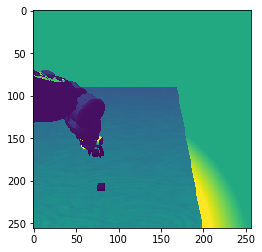

In [41]:
plt.imshow(image_test[:,:,1])
plt.show()

In [10]:
import matplotlib.pyplot as plt
beta_TCVAE.image_test(image_test) - image_test

reconstruct image which has been processed by inverse Z-score


array([[[  0.2607727 ,   0.9083557 ,   1.0808105 ],
        [ -0.7220001 ,   0.55332947,  -0.8456726 ],
        [ -2.4776764 ,  -0.42408752,  -2.2086182 ],
        ...,
        [ -2.348816  ,  -2.4498596 ,  -4.2755737 ],
        [  1.9919281 ,   3.147766  ,   4.7718353 ],
        [-10.310989  ,  -9.316559  ,  -9.855347  ]],

       [[ -0.2980652 ,   0.59043884,   1.7659454 ],
        [  0.9520416 ,   4.011978  ,   2.7196503 ],
        [ -0.1632843 ,  -0.12709045,  -1.2380066 ],
        ...,
        [  0.06036377,  -0.64678955,  -0.3957367 ],
        [ -1.7668304 ,  -0.07948303,  -0.35066223],
        [ -4.4043884 ,  -4.3638153 ,  -3.8139954 ]],

       [[ -2.592331  ,  -2.7234344 ,  -2.547226  ],
        [ -0.8683777 ,   0.5738983 ,  -0.10421753],
        [  0.43014526,   0.7765808 ,   0.39744568],
        ...,
        [  0.45980835,   1.7036743 ,   2.7397003 ],
        [  1.7905884 ,   2.2139282 ,   3.807312  ],
        [ -1.0526123 ,  -1.6480103 ,  -2.7966003 ]],

       ...,

      

In [4]:
import tensorflow as tf

In [59]:
z_mean = tf.zeros([16,10], dtype=tf.float32)

z_logvar= tf.zeros([16,10], dtype=tf.float32)
beta_TCVAE.sess.run(
    0.5 * tf.reduce_sum(
        tf.square(z_mean) + tf.exp(z_logvar) - z_logvar - 1, [1]))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [67]:
beta_TCVAE.sess.run(
    beta_TCVAE.total_correlation(z_mean, z_mean, z_logvar+0.1))

-24.953297

In [15]:
z = tf.zeros([5,1,1,512])

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print sess.run(net).shape

Instructions for updating:
Use `tf.global_variables_initializer` instead.
(5, 6, 6, 512)


In [6]:
import tensorflow as tf
import numpy as np
beta_TCVAE.sess.run(tf.global_variables_initializer())
beta_TCVAE.sess.run(beta_TCVAE.img_rec, feed_dict={beta_TCVAE.img: np.zeros([3,256,256,3])})

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [7]:
mean = 116.77986
std = 57.100357
image = image.astype(np.float32)
image = (image-mean)/std
img_rec = self.sess.run(self.img_rec,
                                   feed_dict={self.img: image[np.newaxis, :]})
print 'reconstruct image which has been processed by inverse Z-score'
img_rec = img_rec*std + mean

array([[[ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -91.9702  ,        nan],
        ...,
        [ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -91.9702  ,        nan]],

       [[ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -91.9702  ,        nan],
        ...,
        [ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -91.9702  ,        nan]],

       [[ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -91.9702  ,        nan],
        ...,
        [ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -91.9702  ,        nan]],

       ...,

       [[ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -91.9702  ,        nan],
        [ 53.254402, -

reconstruct image which has been processed by inverse Z-score


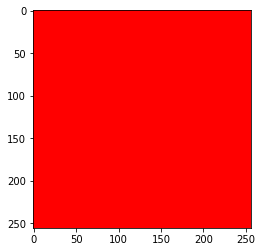

In [6]:
import matplotlib.pyplot as plt
plt.imshow(beta_TCVAE.image_test(image))
plt.show()

In [14]:
from scipy import misc
misc.toimage(image_test, cmin=0, cmax=255).save('/home/baxter/Documents/beta-vae/image_test.png')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


In [10]:
from PIL import Image
image_test = Image.open('image_test.png')

array([[[155, 155, 155],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       [[155, 155, 155],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       [[155, 155, 155],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       ...,

       [[154, 130,  77],
        [155, 132,  82],
        [156, 134,  84],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       [[154, 130,  77],
        [156, 133,  82],
        [157, 133,  83],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       [[154, 128,  75],
        [154, 130,  77],
        [156, 132,  84],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]]

In [14]:
Image.fromarray(image_test)
I.save('new_lena.png')

PIL.Image.Image

In [21]:
np.array(image_test)

array([[[155, 155, 155],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       [[155, 155, 155],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       [[155, 155, 155],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       ...,

       [[154, 130,  77],
        [155, 132,  82],
        [156, 134,  84],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       [[154, 130,  77],
        [156, 133,  82],
        [157, 133,  83],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]],

       [[154, 128,  75],
        [154, 130,  77],
        [156, 132,  84],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [155, 155, 155]]